# Algebra Linear Algorítmica - 2022.1 - Projeto Final - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390

In [16]:
using LinearAlgebra
using Images, ImageIO
using Colors
using Plots
using Statistics
using Clustering
using DelimitedFiles

Forma de separar a explicação do Colab:

- Apresentação do trabalho e objetivo

- Imagens
- - O quê são imagens
- - Como representá-las no computador

- Julia
- - Bibliotecas utilizadas
- - O algoritmo K-Means (Breve explicação)

- Aplicação
- - Caso 1 (3 pixels das cores Red, Green e Blue cada)
- - - Leitura das entradas de dados
- - - Modelagem dos dados
- - - Exibição da distribuição de cores


- - Caso 2 (n*m pixels de cores aleatórias)
- - - Leitura das entradas de dados genérica
- - - Modelagem dos dados genérica
- - - Exibição da distribuição de cores genérica

- - Modularização das funções

- - Caso 3 (Foto)
- - - Explicar como usar o quê usamos até agora em uma foto
- - - Leitura das entradas de dados genérica
- - - Modelagem dos dados genérica
- - - Exibição da distribuição de cores genérica

- K-Means
- - Entradas e Saídas
- - Resultado esperado em cada caso
- - - Execução no Caso 1
- - - Execução no Caso 2
- - - Execução no Caso 3 ( Aqui entra a entrega final da imagem recolorida )

- Exemplo executando K-Means para outras imagens com outros valores de K

- Outros exemplos de aplicações de K-Means além de imagens

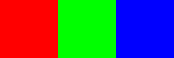

In [32]:
rgb_image_test = [RGB(1.0, 0.0, 0.0) RGB(0.0, 1.0, 0.0) RGB(0.0, 0.0, 1.0)]

In [ ]:
img_CHW = channelview(rgb_image_test)

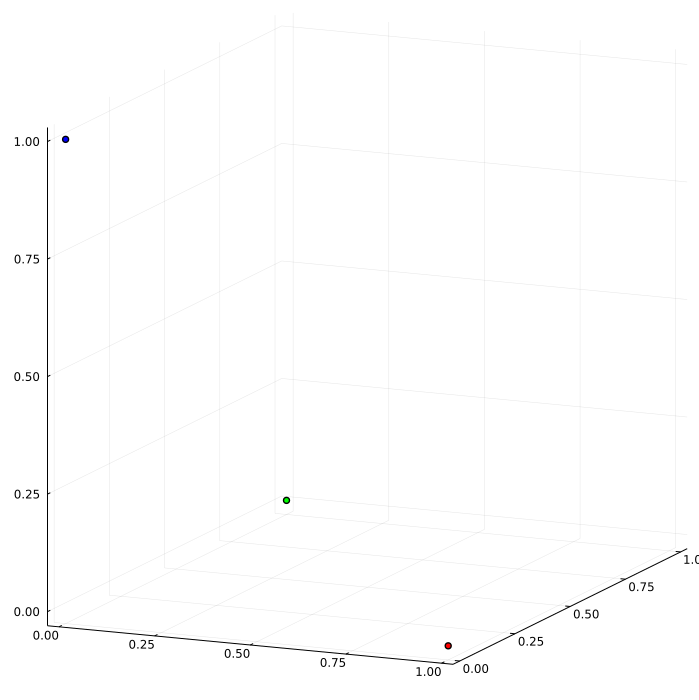

In [34]:
a=img_CHW[:,:,1]
b=img_CHW[:,:,2]
c=img_CHW[:,:,3]

colors = fill(RGB(0.0,0.0,0.0),3)
colors[1] = RGB(img_CHW[:,:,1][1], img_CHW[:,:,1][2], img_CHW[:,:,1][3])
colors[2] = RGB(img_CHW[:,:,2][1], img_CHW[:,:,2][2], img_CHW[:,:,2][3])
colors[3] = RGB(img_CHW[:,:,3][1], img_CHW[:,:,3][2], img_CHW[:,:,3][3])

Plots.scatter(a,b,c,size=(700,700), legend=false, color = colors)


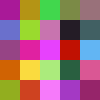

In [2]:
random_rgb_image_test = fill(RGB(0.0,0.0,0.0),5,5)
for i in 1:5
    for j in 1:5
        random = rand(1,3)

        red = random[1]
        green = random[2]
        blue = random[3]

        random_rgb_image_test[i,j] = RGB(red,green,blue)
    end
end
random_rgb_image_test

In [ ]:
random_img_CHW = channelview(random_rgb_image_test)

In [4]:
random_img_CHW[:,5,5][1]

0.5879541900237337

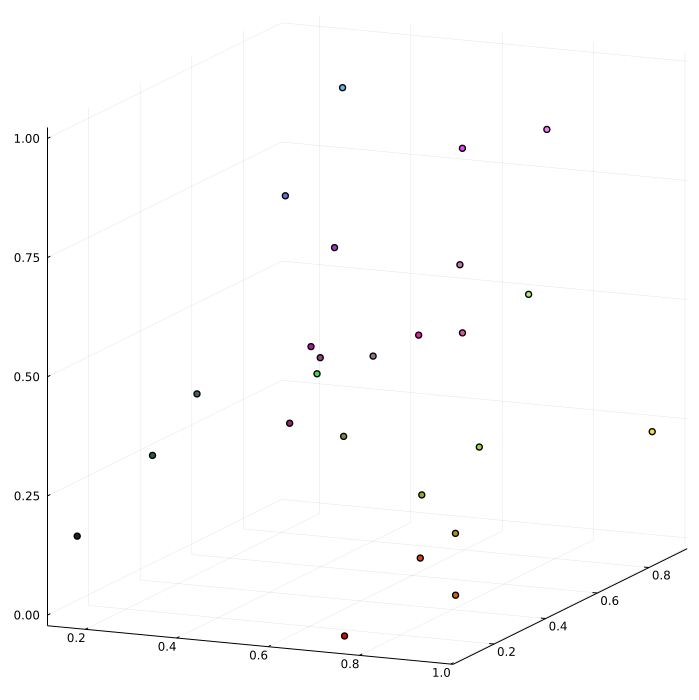

In [6]:
dataset_random_colors_red_values = fill(0.0, 5*5)
dataset_random_colors_green_values = fill(0.0, 5*5)
dataset_random_colors_blue_values = fill(0.0, 5*5)

dataset_colors_random = fill(RGB(0.0,0.0,0.0), 5*5)

for i in 1:5
    for j in 1:5
        dataset_random_colors_red_values[((i-1)*5) + j] = random_img_CHW[:,j,i][1]
        dataset_random_colors_green_values[((i-1)*5) + j] = random_img_CHW[:,j,i][2]
        dataset_random_colors_blue_values[((i-1)*5) + j] = random_img_CHW[:,j,i][3]

        dataset_colors_random[((i-1)*5) + j] = RGB(
            random_img_CHW[:,j,i][1],
            random_img_CHW[:,j,i][2],
            random_img_CHW[:,j,i][3]
        )
    end
end

Plots.scatter(  dataset_random_colors_red_values,
                dataset_random_colors_green_values,
                dataset_random_colors_blue_values,
                size=(700,700), legend=false, color = dataset_colors_random
            )

In [16]:
# MODULARIZAR AQUI

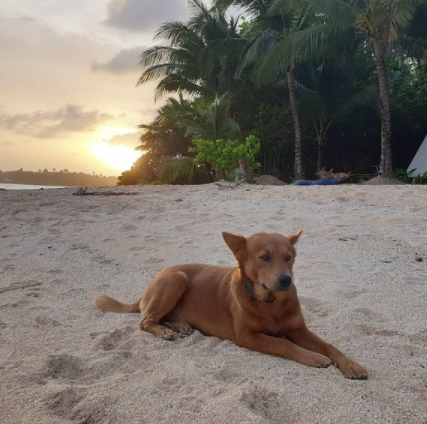

In [2]:
husky_img_path = "doggo.png"
husky_img = load(husky_img_path)

In [ ]:
husky_img_CHW = channelview(husky_img)

In [37]:
_,v,u = size(husky_img_CHW)

dataset_husky_red_values = fill(0.0, v*u)
dataset_husky_green_values = fill(0.0, v*u)
dataset_husky_blue_values = fill(0.0, v*u)

dataset_colors_husky = fill(RGB(0.0,0.0,0.0), v*u)

for i in 1:u
    for j in 1:v
        dataset_husky_red_values[((i-1)*v) + j] = husky_img_CHW[:,j,i][1]
        dataset_husky_green_values[((i-1)*v) + j] = husky_img_CHW[:,j,i][2]
        dataset_husky_blue_values[((i-1)*v) + j] = husky_img_CHW[:,j,i][3]

        dataset_colors_husky[((i-1)*v) + j] = RGB(
            husky_img_CHW[:,j,i][1],
            husky_img_CHW[:,j,i][2],
            husky_img_CHW[:,j,i][3]
        )
    end
end

In [40]:
Plots.scatter(  dataset_husky_red_values,
                dataset_husky_green_values,
                dataset_husky_blue_values,
                size=(1200,1200), legend=false, color = dataset_colors_husky, alpha=0.55
            )

ErrorException: Cannot convert RGB{Float64} to series data for plotting

In [37]:
#K-Means no RGB Básico
k_means_base_matrice = hcat(a,b,c)
R1 = kmeans(k_means_base_matrice, 3; maxiter=200, display=:iter)

KmeansResult{Array{Float64,2},Float64,Int64}([1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0], [1, 2, 3], [0.0, 0.0, 0.0], [1, 1, 1], [1, 1, 1], 0.0, 0, true)

In [13]:
#Extraindo resultado do K-Means para Array novamente
means_assignments = assignments(R1) # get the assignments of points to clusters
means_count = counts(R1) # get the cluster sizes
means_centers = R1.centers # get the cluster centers

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [ ]:
a_means=means_centers[:,1]
b_means=means_centers[:,2]
c_means=means_centers[:,3]
Plots.scatter(a_means,b_means,c_means,size=(700,700), legend=false)

In [ ]:
#K-Means no RGB Random
k_means_base_matrice_random = hcat(a_random,b_random,c_random)
R2 = kmeans(k_means_base_matrice_random, 3; maxiter=200, display=:iter)

In [ ]:
#Extraindo resultado do K-Means para Array novamente
means_random_assignments = assignments(R2) # get the assignments of points to clusters
means_random_count = counts(R2) # get the cluster sizes
means_random_centers = R2.centers # get the cluster centers

In [ ]:
a_means_random=means_random_centers[:,1]
b_means_random=means_random_centers[:,2]
c_means_random=means_random_centers[:,3]
scatter(a_means_random,b_means_random,c_means_random,size=(700,700), legend=false)

In [6]:
#K-Means na foto
k_means_base_matrice_img = hcat(dataset_husky_red_values,dataset_husky_green_values,dataset_husky_blue_values)
R_image = kmeans(k_means_base_matrice_img, 3; maxiter=200, display=:iter)

KmeansResult{Array{Float64,2},Float64,Int64}([0.8431372549019608 0.8274509803921568 0.796078431372549; 0.8431372549019608 0.8274509803921568 0.792156862745098; … ; 0.4666666666666667 0.4 0.37254901960784315; 0.4549019607843137 0.38823529411764707 0.3607843137254902], [1, 2, 3], [0.0, 0.0, 0.0], [1, 1, 1], [1, 1, 1], 0.0, 0, true)

In [ ]:
#Extraindo resultado do K-Means para Array novamente
means_img_assignments = assignments(R_image) # get the assignments of points to clusters
means_img_count = counts(R_image) # get the cluster sizes
means_img_centers = R_image.centers # get the cluster centers


In [23]:
img_means_new_red_values=means_img_centers[:,1]
img_means_new_green_values=means_img_centers[:,2]
img_means_new_blue_values=means_img_centers[:,3]

_,v,u = size(husky_img_CHW)

mean_red = mean(means_img_centers[:,1], dims=1)
mean_green = mean(means_img_centers[:,2], dims=1)
mean_blue = mean(means_img_centers[:,3], dims=1)

for i in 1:u
    for j in 1:v
        dataset_colors_husky[((i-1)*v) + j] = RGB(
            mean_red[1],
            mean_green[1],
            mean_blue[1]
        )
    end
end


In [36]:
println([img_means_new_red_values[3000]])
println([img_means_new_green_values[3000]])
println([img_means_new_blue_values[3000]])
RGB(img_means_new_red_values[3000], img_means_new_green_values[3000], img_means_new_blue_values[3000])

[0.796078431372549]
[0.7647058823529411]
[0.7215686274509804]


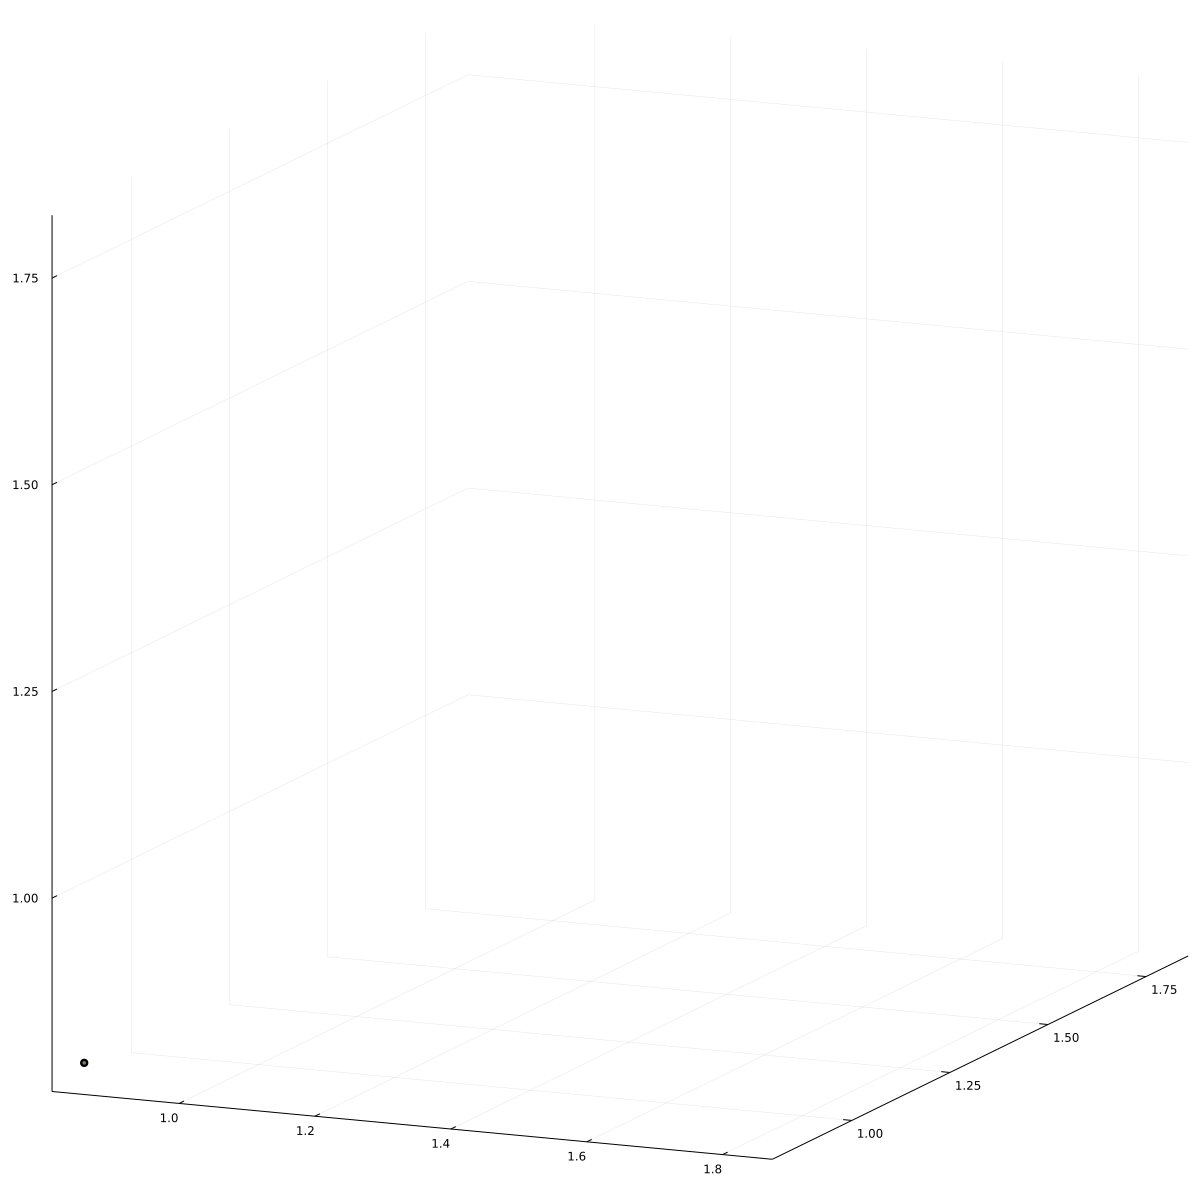

In [31]:
Plots.scatter(  [img_means_new_red_values[1]],
                [img_means_new_green_values[1]],
                [img_means_new_blue_values[1]],size=(1200,1200), legend=false, color = [dataset_colors_husky[1]], alpha=1)